In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [23]:
Y_train = pd.read_csv('../csv&excel/Y_train.csv')
Y_test = pd.read_csv('../csv&excel/Y_test.csv')
X_train = pd.read_csv('../csv&excel/X_train.csv')
X_test = pd.read_csv('../csv&excel/X_test.csv')
# xgboost weight 파라미터
scale_pos_weight_ss = Y_train.value_counts()[0] / Y_train.value_counts()[1]

In [24]:
# 하이퍼파라미터 조정 전
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=100),
        SVC(),
        RandomForestClassifier(max_depth=100),
        XGBClassifier(max_depth=100),
        KNeighborsClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train, Y_train, X_test, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,LogisticRegression(),0.52,0.53,0.62,0.57,0.59,0.58,0.74,0.65
1,DecisionTreeClassifier(max_depth=100),0.51,0.53,0.53,0.53,1.00,1.00,1.00,1.00
2,SVC(),0.50,0.52,0.63,0.57,0.61,0.60,0.76,0.67
3,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.53,0.55,0.56,0.55,1.00,1.00,1.00,1.00
4,"XGBClassifier(base_score=None, booster=None, c...",0.51,0.53,0.53,0.53,1.00,1.00,1.00,1.00
5,KNeighborsClassifier(),0.49,0.50,0.53,0.52,0.70,0.71,0.69,0.70


In [25]:
# 하이퍼파라미터 조정 후
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200, class_weight='balanced'),
        DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=0.1, class_weight='balanced'),
        SVC(kernel='linear', gamma='auto', C=0.1, class_weight='balanced'),
        RandomForestClassifier(criterion='log_loss', max_depth= 12, max_features= "sqrt", max_leaf_nodes = 9, n_estimators= 25, random_state=111),
        XGBClassifier(learning_rate=0.05, n_estimators=300, scale_pos_weight=scale_pos_weight_ss, min_child_weight=4, subsample=0.5, colsample_bytree=0.6, max_depth=7, gamma=1, reg_alpha=0.8, reg_lambda=0),
        KNeighborsClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train, Y_train, X_test, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,"LogisticRegression(C=0.1, class_weight='balanc...",0.50,0.52,0.56,0.54,0.57,0.57,0.69,0.62
1,DecisionTreeClassifier(class_weight='balanced'...,0.50,0.52,0.51,0.51,1.00,1.00,1.00,1.00
2,"SVC(C=0.1, class_weight='balanced', gamma='aut...",0.50,0.52,0.59,0.55,0.58,0.58,0.72,0.64
3,"(DecisionTreeClassifier(criterion='log_loss', ...",0.49,0.50,0.50,0.50,0.72,0.71,0.77,0.74
4,"XGBClassifier(base_score=None, booster=None, c...",0.54,0.56,0.56,0.56,0.89,0.90,0.88,0.89
5,KNeighborsClassifier(),0.49,0.50,0.53,0.52,0.70,0.71,0.69,0.70


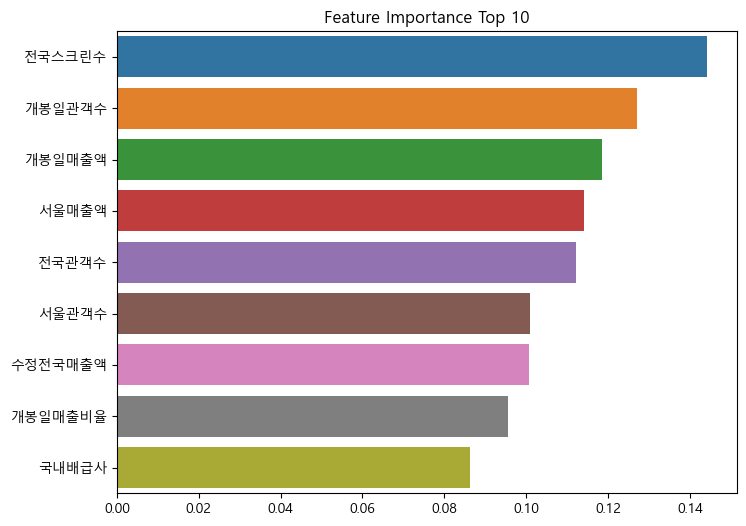

In [26]:
ls = list(X_train.columns)
X_train_2 = X_train[ls]
y_train_2 = Y_train.copy()
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
model = XGBClassifier(max_depth=3)
model.fit(X_train_2, y_train_2)

# 배열형태로 반환
ft_importance_values = model.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_2.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:10]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 10')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()